In [1]:
#pandas설치 필요 pip install pandas
#seaborn설치 pip install seaborn
#pip install matplotlib
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('C:/Users/user/OneDrive - 목포대학교/구글드라이브/학교업무/강의/2020-2학기/강의/기계학습4학년/파이썬코드/dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [3]:
# 처음 5줄을 봅니다.
print(df.head(10))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
5         5     116        74          0        0  25.6     0.201   30      0
6         3      78        50         32       88  31.0     0.248   26      1
7        10     115         0          0        0  35.3     0.134   29      0
8         2     197        70         45      543  30.5     0.158   53      1
9         8     125        96          0        0   0.0     0.232   54      1


In [4]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [6]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


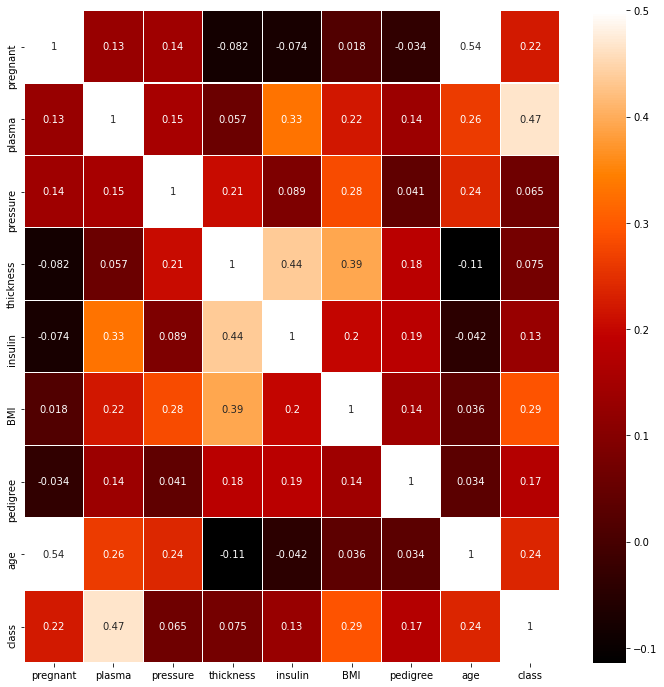

In [9]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

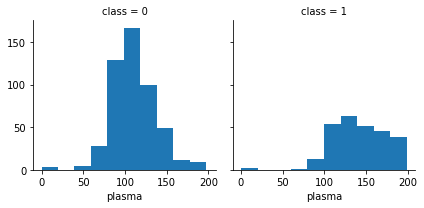

In [10]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

In [12]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt('C:/Users/user/OneDrive - 목포대학교/구글드라이브/학교업무/강의/2020-2학기/강의/기계학습4학년/파이썬코드/dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=500, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 1/500
77/77 [==============================] - 0s 571us/step - loss: 2.2114 - accuracy: 0.5482
Epoch 2/500
77/77 [==============================] - 0s 597us/step - loss: 0.7821 - accuracy: 0.6289
Epoch 3/500
77/77 [==============================] - 0s 623us/step - loss: 0.6954 - accuracy: 0.6393
Epoch 4/500
77/77 [==============================] - 0s 597us/step - loss: 0.6589 - accuracy: 0.6706
Epoch 5/500
77/77 [==============================] - 0s 610us/step - loss: 0.6574 - accuracy: 0.6549
Epoch 6/500
77/77 [==============================] - 0s 584us/step - loss: 0.6371 - accuracy: 0.6484
Epoch 7/500
77/77 [==============================] - 0s 610us/step - loss: 0.6532 - accuracy: 0.6432
Epoch 8/500
77/77 [==============================] - 0s 623us/step - loss: 0.6506 - accuracy: 0.6497
Epoch 9/500
77/77 [==============================] - 0s 610us/step - loss: 0.6333 - accuracy: 0.6484
Epoch 10/500
77/77 [==============================] - 0s 701us/step - loss: 0.6360 - accura

77/77 [==============================] - 0s 597us/step - loss: 0.4616 - accuracy: 0.7826
Epoch 161/500
77/77 [==============================] - 0s 610us/step - loss: 0.4751 - accuracy: 0.7643
Epoch 162/500
77/77 [==============================] - 0s 714us/step - loss: 0.4552 - accuracy: 0.7891
Epoch 163/500
77/77 [==============================] - 0s 649us/step - loss: 0.4575 - accuracy: 0.7904
Epoch 164/500
77/77 [==============================] - 0s 701us/step - loss: 0.4636 - accuracy: 0.7891
Epoch 165/500
77/77 [==============================] - 0s 766us/step - loss: 0.4555 - accuracy: 0.7760
Epoch 166/500
77/77 [==============================] - 0s 753us/step - loss: 0.4561 - accuracy: 0.7695
Epoch 167/500
77/77 [==============================] - 0s 649us/step - loss: 0.4545 - accuracy: 0.7891
Epoch 168/500
77/77 [==============================] - 0s 688us/step - loss: 0.4614 - accuracy: 0.7799
Epoch 169/500
77/77 [==============================] - 0s 584us/step - loss: 0.4511 - a

77/77 [==============================] - 0s 597us/step - loss: 0.4282 - accuracy: 0.7969
Epoch 319/500
77/77 [==============================] - 0s 636us/step - loss: 0.4288 - accuracy: 0.8034
Epoch 320/500
77/77 [==============================] - 0s 610us/step - loss: 0.4383 - accuracy: 0.7917
Epoch 321/500
77/77 [==============================] - 0s 610us/step - loss: 0.4344 - accuracy: 0.8008
Epoch 322/500
77/77 [==============================] - 0s 597us/step - loss: 0.4418 - accuracy: 0.7786
Epoch 323/500
77/77 [==============================] - 0s 610us/step - loss: 0.4273 - accuracy: 0.7995
Epoch 324/500
77/77 [==============================] - 0s 571us/step - loss: 0.4232 - accuracy: 0.8021
Epoch 325/500
77/77 [==============================] - 0s 597us/step - loss: 0.4322 - accuracy: 0.7969
Epoch 326/500
77/77 [==============================] - 0s 597us/step - loss: 0.4430 - accuracy: 0.7878
Epoch 327/500
77/77 [==============================] - 0s 558us/step - loss: 0.4440 - a

77/77 [==============================] - 0s 610us/step - loss: 0.4101 - accuracy: 0.8125
Epoch 477/500
77/77 [==============================] - 0s 610us/step - loss: 0.4140 - accuracy: 0.8073
Epoch 478/500
77/77 [==============================] - 0s 597us/step - loss: 0.4222 - accuracy: 0.7982
Epoch 479/500
77/77 [==============================] - 0s 597us/step - loss: 0.4154 - accuracy: 0.8086
Epoch 480/500
77/77 [==============================] - 0s 610us/step - loss: 0.4176 - accuracy: 0.8060
Epoch 481/500
77/77 [==============================] - 0s 611us/step - loss: 0.4202 - accuracy: 0.7969
Epoch 482/500
77/77 [==============================] - 0s 714us/step - loss: 0.4155 - accuracy: 0.8047
Epoch 483/500
77/77 [==============================] - 0s 611us/step - loss: 0.4066 - accuracy: 0.8021
Epoch 484/500
77/77 [==============================] - 0s 597us/step - loss: 0.4117 - accuracy: 0.8086
Epoch 485/500
77/77 [==============================] - 0s 611us/step - loss: 0.4408 - a